#### Autor: Jesús David Núñez Rodríguez A01634928
### Descripción del problema:  
Clasificar pacientes con Hernia de disco y espondilolistesis en dos categorias(normal y anormal). Información disponible 100 pacientes clasificados como normal y 210 pacientes clasificados como anormal.  
#### Descripción de variables  
Cada paciente cuenta con 6 atributos referentes a su biomecanica derivado de la orientación de la pelvis y espina dorsal.  

**Nombre**: pelvic incidence, **tipo de variable**: Cuantitativa numerica  
**Nombre**: pelvic tilt, **tipo de variable**: Cuantitativa numerica  
**Nombre**: lumbar lordosis angle, **tipo de variable**: Cuantitativa numerica  
**Nombre**: sacral slope, **tipo de variable**: Cuantitativa numerica   
**Nombre**: pelvic radius, **tipo de variable**: Cuantitativa numerica  
**Nombre**: grade of spondylolisthesis, **tipo de variable**: Cuantitativa numerica  
**Nombre**: class, **tipo de variable**: Cualitativa categorica  
*Esta ultima variable se transformará en una variable dummie 0 y 1 para abnormal y normal respectivamente.

#### Fuente  
Datos extraidos de kaggle pero la fuente original es:  
Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science

In [85]:
#Librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from math import e,log
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as atlas
from sklearn.model_selection import cross_validate
from scipy.stats import shapiro
warnings.filterwarnings('ignore')
%matplotlib inline

## Exploración de datos

In [86]:
df = pd.read_csv("/content/drive/MyDrive/AaTecM/semestre_7mo/machine_learning/column_2C_weka.csv")
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


Se cambia el tipo de variable en el atributo class (siendo abnormal:0 y normal:1) para poder manipularla más adelante.

In [87]:
df = pd.get_dummies(df, columns = ["class"], drop_first = True)
df.columns = df.columns.str.replace('class_Normal', 'class')
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


El siguiente paso es validar tipos de datos de las variables y si hay valores nulos

In [88]:
#Validar tipo de dato y si hay valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    uint8  
dtypes: float64(6), uint8(1)
memory usage: 15.0 KB


El dataframe se encuentra sin valores nulos, así mismo 6 variables son de tipo float y una de tipo int.  
Se prosigue a examinar los quantiles, mediana, media y desviación estandar.

In [89]:
#Inspeccionar quantiles, mediana y desviación estandar.
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.322581
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,1.000000


Como paso siguiente se realiza un scatterplot para identificar el comportamiento de los datos así como posibles valores atipicos.

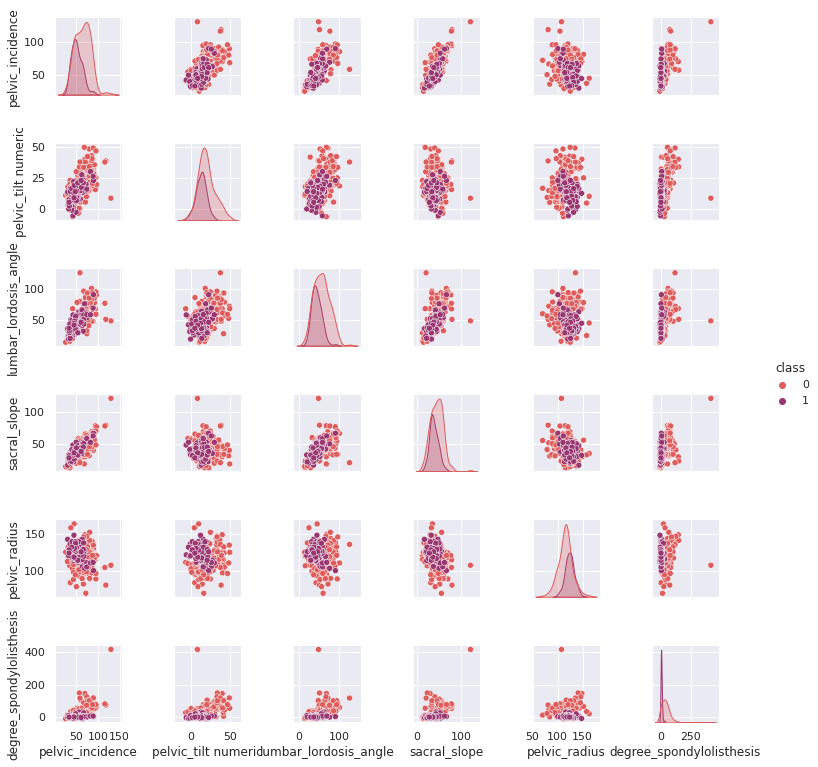

In [90]:
sns.set()
sns.pairplot(df, hue='class',height = 1.8, palette = 'flare')

En las gráficas podemos observar que hay datos atipicos, los cuales deben ser retirados para eliminar ruido en el entrenamiento del modelo. Despues de eliminar los valores atipicos tendriamos los siguientes valores.

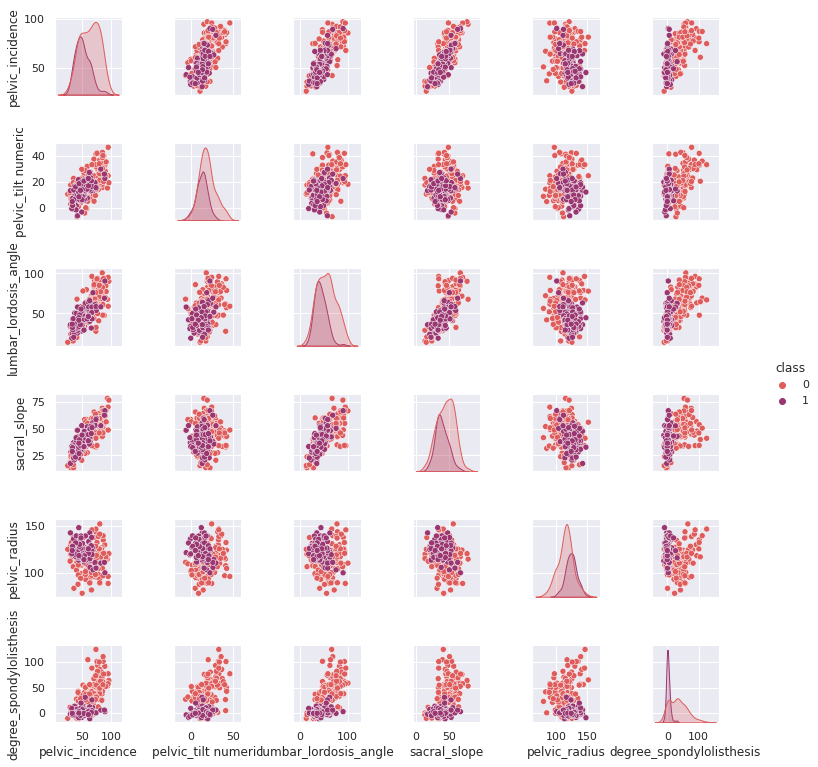

In [91]:
# Se eliminan los datos atipicos de las columnas 'to_user_distance','to_user_elevation','total_earning'
df = df[(np.abs(stats.zscore(df[['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']])) < 3).all(axis=1)]
sns.set()
sns.pairplot(df, hue='class',height = 1.8, palette = 'flare')

A continuación se obtiene la frecuencia de cada resultado de la variable class.

0    198
1    100
Name: class, dtype: int64

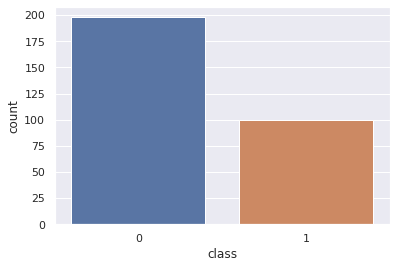

In [92]:
sns.countplot(x="class", data=df)
df.loc[:,'class'].value_counts()

#### Pruebas de sesgo y curtosis

Sesgo pelvic_incidence: 0.217   Curstosis pelvic_incidence: -0.913
Sesgo pelvic_tilt numeric: 0.511   Curstosis pelvic_tilt numeric: -0.913
Sesgo lumbar_lordosis_angle: 0.492   Curstosis lumbar_lordosis_angle: -0.387
Sesgo sacral_slope: 0.126   Curstosis sacral_slope: -0.435
Sesgo pelvic_radius: -0.257   Curstosis pelvic_radius: 0.299
Sesgo degree_spondylolisthesis: 1.082   Curstosis degree_spondylolisthesis: 0.553


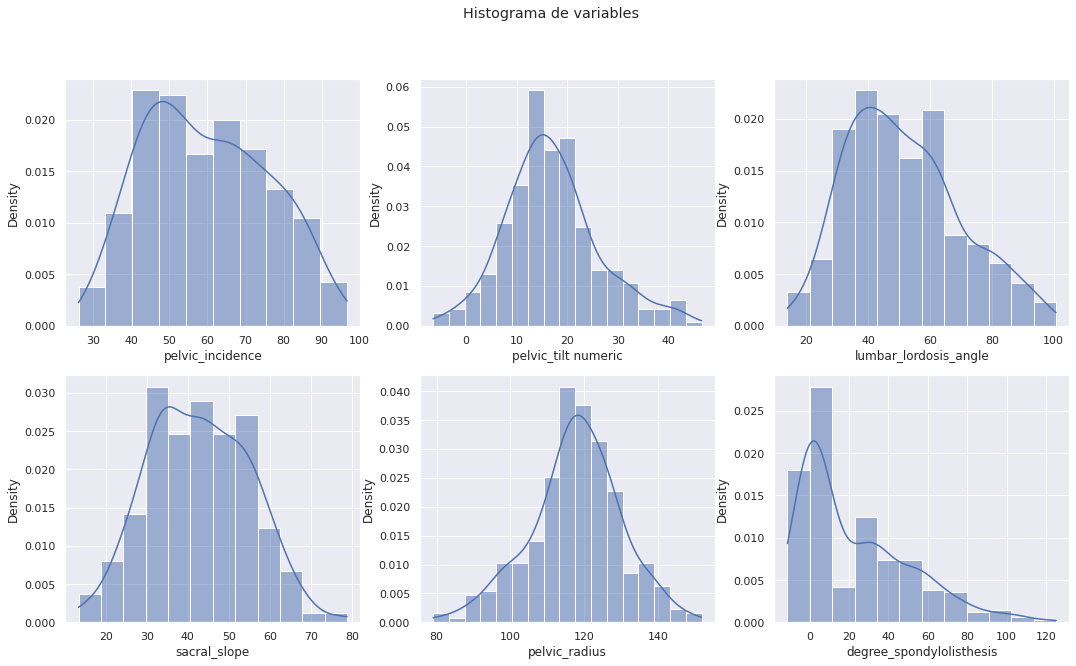

In [93]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Histograma de variables')

sns.histplot(ax=axes[0, 0], data = df['pelvic_incidence'], kde=True, stat="density")
sns.histplot(ax=axes[0, 1], data = df['pelvic_tilt numeric'], kde=True, stat="density")
sns.histplot(ax=axes[0, 2], data = df['lumbar_lordosis_angle'], kde=True, stat="density")
sns.histplot(ax=axes[1, 0], data = df['sacral_slope'], kde=True, stat="density")
sns.histplot(ax=axes[1, 1], data = df['pelvic_radius'], kde=True, stat="density")
sns.histplot(ax=axes[1, 2], data = df['degree_spondylolisthesis'], kde=True, stat="density")

print('Sesgo pelvic_incidence: ' + str(round(skew(df['pelvic_incidence']),3)) + '   Curstosis pelvic_incidence: ' + str(round(kurtosis(df['pelvic_incidence']),3)))
print('Sesgo pelvic_tilt numeric: ' + str(round(skew(df['pelvic_tilt numeric']),3)) + '   Curstosis pelvic_tilt numeric: ' + str(round(kurtosis(df['pelvic_incidence']),3)))
print('Sesgo lumbar_lordosis_angle: ' + str(round(skew(df['lumbar_lordosis_angle']),3)) + '   Curstosis lumbar_lordosis_angle: ' + str(round(kurtosis(df['lumbar_lordosis_angle']),3)))
print('Sesgo sacral_slope: ' + str(round(skew(df['sacral_slope']),3)) + '   Curstosis sacral_slope: ' + str(round(kurtosis(df['sacral_slope']),3)))
print('Sesgo pelvic_radius: ' + str(round(skew(df['pelvic_radius']),3)) + '   Curstosis pelvic_radius: ' + str(round(kurtosis(df['pelvic_radius']),3)))
print('Sesgo degree_spondylolisthesis: ' + str(round(skew(df['degree_spondylolisthesis']),3)) + '   Curstosis degree_spondylolisthesis: ' + str(round(kurtosis(df['degree_spondylolisthesis']),3)))

Tomando como referencia que un valor con diferencia respecto a 0 mayor a 0.5 se considera un sesgo moderado y un valor mayor a 1 se considera sesgo significativo. 
Se puede concluir que la variable pelvic_tilt numeric tiene sesgo positivo moderado hacia la derecha. Así mismo la variable degree_spondylolisthesis tiene sesgo significativo positivo hacia la derecha. El resto de las variables se presumen simestricas de acuerdo a esa metrica.  
Sumado a esto la prueba de curtosis confirma que efectivamente tienen sesgo las variables antes mencionadas, así mismo la variable pelvic_incidence. Ya que el valor de curtosis arrojado por estas variables ya que la diferencia de su resultado respecto a 0 es mayor a 0.5.  
  
## Modelo  
Ahora es necesario seleccionar un modelo que sea util para clasificar, ya que la variable dependiente de interes es de tipo categorica. Para este analisis se utilizará el modelo de regresión logistica, por lo que será necesario dividir el dataset en subdatasets de entrenamiento, prueba y validación.  
La relación de estas separaciones será de 10% para validación y el 90% restante se dividirá 80/20 para entrenamiento y prueba respectivamente.

In [94]:
X= df.drop(columns = 'class').to_numpy() #Variable independiente
y= df["class"].to_numpy() #Variable dependiente

#Se dividen los datos para tener una sección que sirva para validar y otra que se usará para alimentar el modelo.
X, X_validacion, y, y_validacion = train_test_split(X,y,random_state=0, train_size= 0.9)

#Se dividen los datos para tener datos de entrenamiento y de pruebas
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, train_size= 0.8)

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

         Current function value: inf
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  214
Model:                          Logit   Df Residuals:                      207
Method:                           MLE   Df Model:                            6
Date:                Mon, 19 Sep 2022   Pseudo R-squ.:                     inf
Time:                        03:10:41   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.2076      4.594     -4.399      0.000     -29.211     -11.204
x1           -19.7192        nan        nan        nan         nan    

Despues de utilizar el framework que nos ayuda a obtener el modelo de regresión logistica, arrojó que supero el limite de iteraciones por lo que no convergió. De igual manera se validará la efectividad de este primer modelo.

#### Lista de Valores de predicción por el modelo utilizando los datos de entrenamiento y precisión del modelo.

In [95]:

predicciones = modelo.predict(exog = X_train)

# Clasificación predicción
clasificacion = np.where(predicciones<0.5, 0, 1)
print(clasificacion)

X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"La precisión de test es: {100*accuracy}%")

[0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1
 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0
 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0]

La precisión de test es: 92.5925925925926%


El modelo arrojá un porcetaje de precisión muy alto, por lo que ahora se corrobora con la matriz de confusión.

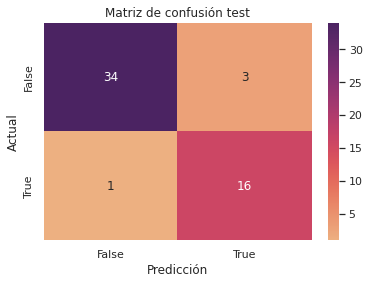

In [96]:
# Matriz de confusión de las predicciones de test
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
fx = sns.heatmap(confusion_matrix, annot=True, cmap='flare')

# labels the title and x, y axis of plot
fx.set_title('Matriz de confusión test');
fx.set_xlabel('Predicción')
fx.set_ylabel('Actual');

# labels the boxes
fx.xaxis.set_ticklabels(['False','True'])
fx.yaxis.set_ticklabels(['False','True'])

atlas.show()

Con lo cual efectivamente se valida que el modelo es confiable. Por ultimo evaluaremos el modelo con el subdataset de validación para comprobar que es confiable.  
  
#### Lista de valores predichos por el modelo y su precisión respecto al valor real utilizando el subataset validación.

In [97]:
X_validacion = sm.add_constant(X_validacion, prepend=True)
predicciones_v = modelo.predict(exog = X_validacion)

# Clasificación predicción
clasificacion_v = np.where(predicciones_v<0.5, 0, 1)
print(clasificacion_v)

accuracy_v = accuracy_score(
            y_true    = y_validacion,
            y_pred    = clasificacion_v,
            normalize = True
           )
print("")
print(f"la precisión de validación es: {100*accuracy_v}%")

[0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0]

la precisión de validación es: 83.33333333333334%


Pese a que el modelo a disminuido su precisión, sigue siendo un modelo con un porcentaje de precisión aceptable. Por ultimo se analiza la matriz de confusión.

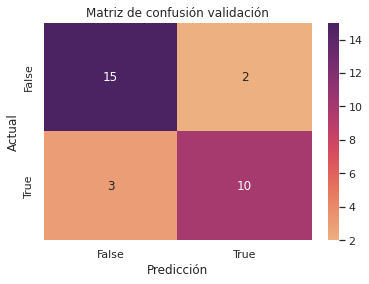

In [98]:
# Matriz de confusión de las predicciones de test
confusion_matrix_v = pd.crosstab(
    y_validacion.ravel(),
    clasificacion_v,
    rownames=['Real'],
    colnames=['Predicción']
)
fx = sns.heatmap(confusion_matrix_v, annot=True, cmap='flare')

# labels the title and x, y axis of plot
fx.set_title('Matriz de confusión validación');
fx.set_xlabel('Predicción')
fx.set_ylabel('Actual');

# labels the boxes
fx.xaxis.set_ticklabels(['False','True'])
fx.yaxis.set_ticklabels(['False','True'])

atlas.show()

Como se puede observar en la gráfica, el modelo arroja una cantidad de valores no significativa con falso positivos y falso negativos.  
#### Diagnóstico de ajuste  
Con la evidencia antes presentada se comprueba que el modelo tiene un buen balance de ajuste(balance), ya que cuenta con un error aceptable en el entrenamiento y un error aceptable de generalización(utilizando el subset de validación).  

#### Predicciones individuales para validar el modelo
Para las pruebas individuales se seleccionarán al azar 5 numeros dentro del rango del tamaño del subset de validación [24, 14, 3, 0, 2]

In [99]:
import random
random_number = []
random.seed(a=1234, version=2)
for i in range(0,5):
  random_number.append(random.randrange(len(y_validacion)))
random_number

[24, 14, 3, 0, 2]

In [100]:
prediccion_ind = modelo.predict(exog = X_validacion[24])

# Clasificación predicción
clasificacion_ind = np.where(prediccion_ind<0.5, 0, 1)
print('Prueba 1')
print('Valor de predicción(24): ' +  str(clasificacion_ind[0]) + '  Valor real(24): ' +  str(y_validacion[24]))

prediccion_ind = modelo.predict(exog = X_validacion[14])

# Clasificación predicción
clasificacion_ind = np.where(prediccion_ind<0.5, 0, 1)
print('Prueba 2')
print('Valor de predicción(14): ' +  str(clasificacion_ind[0]) + '  Valor real(14): ' +  str(y_validacion[14]))

prediccion_ind = modelo.predict(exog = X_validacion[3])

# Clasificación predicción
clasificacion_ind = np.where(prediccion_ind<0.5, 0, 1)
print('Prueba 3')
print('Valor de predicción(3): ' +  str(clasificacion_ind[0]) + '  Valor real(3): ' +  str(y_validacion[3]))

prediccion_ind = modelo.predict(exog = X_validacion[0])

# Clasificación predicción
clasificacion_ind = np.where(prediccion_ind<0.5, 0, 1)
print('Prueba 4')
print('Valor de predicción(0): ' +  str(clasificacion_ind[0]) + '  Valor real(0): ' +  str(y_validacion[0]))

prediccion_ind = modelo.predict(exog = X_validacion[2])

# Clasificación predicción
clasificacion_ind = np.where(prediccion_ind<0.5, 0, 1)
print('Prueba 5')
print('Valor de predicción(2): ' +  str(clasificacion_ind[0]) + '  Valor real(2): ' +  str(y_validacion[2]))

Prueba 1
Valor de predicción(24): 0  Valor real(24): 0
Prueba 2
Valor de predicción(14): 0  Valor real(14): 0
Prueba 3
Valor de predicción(3): 1  Valor real(3): 1
Prueba 4
Valor de predicción(0): 0  Valor real(0): 0
Prueba 5
Valor de predicción(2): 0  Valor real(2): 0


tras realizar las pruebas el 100% de las pruebas fueron positivas, a pesar de que el modelo tiene un 83% de precisión en las pruebas individuales no hubo ningun caso de falso positivo o falso negativo.

## Mejoras al modelo
Pese a que el primer modelo fue bastante bueno, se realizará la segunda evaluación se realizará una procesamiento adiconal a los datos con el objetivo de normalizarlos y sean de mejor calidad para el modelo.  Así mismo se buscarán ajustar el modelo para incrementar su precisión.  
Primero hay que observar gráficamente variables cumplen con normalidad y posteriormente validarlo con la prueba Shapiro-Wilk.

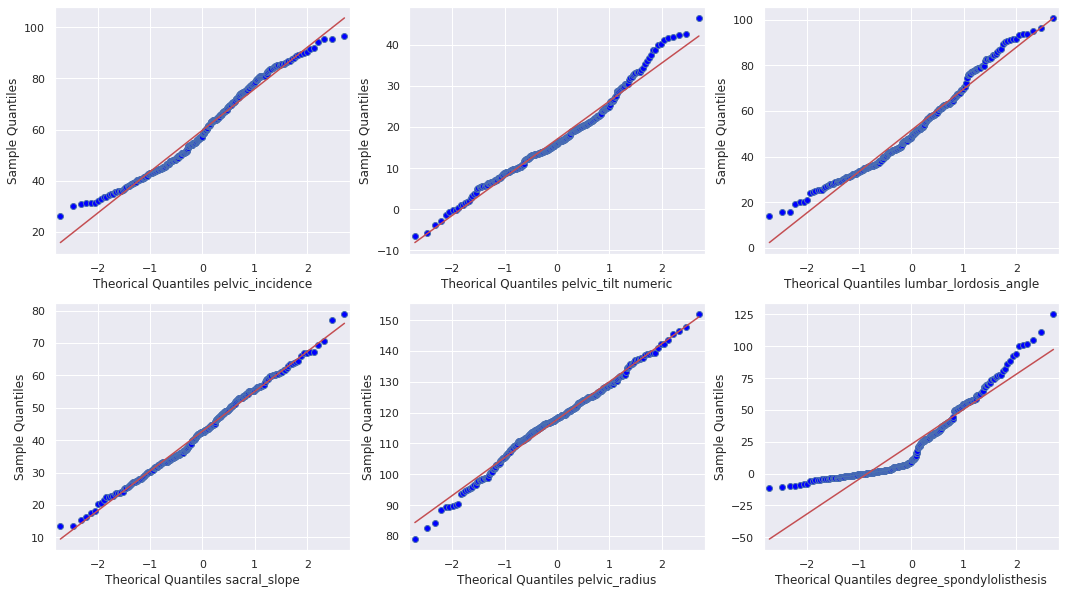

Pruebas de Shapiro-Wilk
Estadisticos pelvic_incidence= 0.97404, p= 0.00003
Estadisticos pelvic_tilt numeric= 0.97753, p= 0.00013
Estadisticos lumbar_lordosis_angle= 0.97127, p= 0.00001
Estadisticos sacral_slope= 0.99252, p= 0.14019
Estadisticos pelvic_radius= 0.99072, p= 0.05637
Estadisticos degree_spondylolisthesis= 0.87323, p= 0.00000


In [101]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

qqplot(df['pelvic_incidence'] , line='s', ax=axes[0, 0], xlabel='Theorical Quantiles pelvic_incidence')
qqplot(df['pelvic_tilt numeric'] , line='s', ax=axes[0, 1], xlabel='Theorical Quantiles pelvic_tilt numeric')
qqplot(df['lumbar_lordosis_angle'] , line='s', ax=axes[0, 2], xlabel='Theorical Quantiles lumbar_lordosis_angle')
qqplot(df['sacral_slope'] , line='s', ax=axes[1, 0], xlabel='Theorical Quantiles sacral_slope')
qqplot(df['pelvic_radius'] , line='s', ax=axes[1, 1], xlabel='Theorical Quantiles pelvic_radius')
qqplot(df['degree_spondylolisthesis'] , line='s', ax=axes[1, 2], xlabel='Theorical Quantiles degree_spondylolisthesis')
plt.show()

print('Pruebas de Shapiro-Wilk')
# Prueba de Shapiro-Wilk
for i in df.columns:
  if i != 'class':
    stat, p = shapiro(df[i])
    print('Estadisticos ' + i + '= %.5f, p= %.5f' % (stat, p))

Graficamente se puede observar que las colas presentan comportamientos anormales. Así mismo los resultados de la prueba Shapiro-Wilk rechaza H0 en 4 de las 6 variables, solamente la variable sacral_slope cumple con normalidad y la variable pelvic_radius cumple con una diferencia minima a 0.05.  Como ya se había identificado anteriormente, la variable con mayor anormalidad es degree_spondylolisthesis, pudiendose observar en la gráfica y comprobado con su valor p de 0.00000.  
  
#### Transformación Box-cox
Tras realizar una transformación de Box-Cox, a continuación se muestra el resumen estadistico de los datos. La transformación se realizó a las variables: 'pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 'pelvic_radius', 'degree_spondylolisthesis'. Debido a que eran las que no pasaban la prueba de normalidad.  
Por ultimo se comenta que fue necesario agregar una constante a las columnas que incluian valores negativos, esta constante fue el minimo requerido para que todos sus valores fueran positivos.

In [102]:
df['pelvic_incidence'], lamba_value  = stats.boxcox(df.loc[:,'pelvic_incidence'])
df['pelvic_tilt numeric'], lamba_value  = stats.boxcox(df.loc[:,'pelvic_tilt numeric']+ 6.6)
df['lumbar_lordosis_angle'], lamba_value  = stats.boxcox(df.loc[:,'lumbar_lordosis_angle'])
df['pelvic_radius'], lamba_value  = stats.boxcox(df.loc[:,'pelvic_radius'])
df['degree_spondylolisthesis'], lamba_value  = stats.boxcox(df.loc[:,'degree_spondylolisthesis']+ 11.1)

In [103]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,11.009159,12.195983,8.408860,42.764592,2484.318832,5.106429,0.335570
std,1.581469,4.017281,1.436403,12.296487,449.078162,2.033320,0.472984
min,7.116121,-1.226304,4.363274,13.366931,1224.186509,-2.176776,0.000000
25%,9.748697,9.606184,7.281672,33.427411,2221.130540,3.557636,0.000000
50%,10.931637,11.998389,8.360184,42.460492,2483.683326,4.599016,0.000000
75%,12.293033,14.281762,9.401113,52.475365,2753.441375,6.735050,1.000000
max,14.213624,23.591457,11.624821,78.794052,3857.718228,9.798893,1.000000


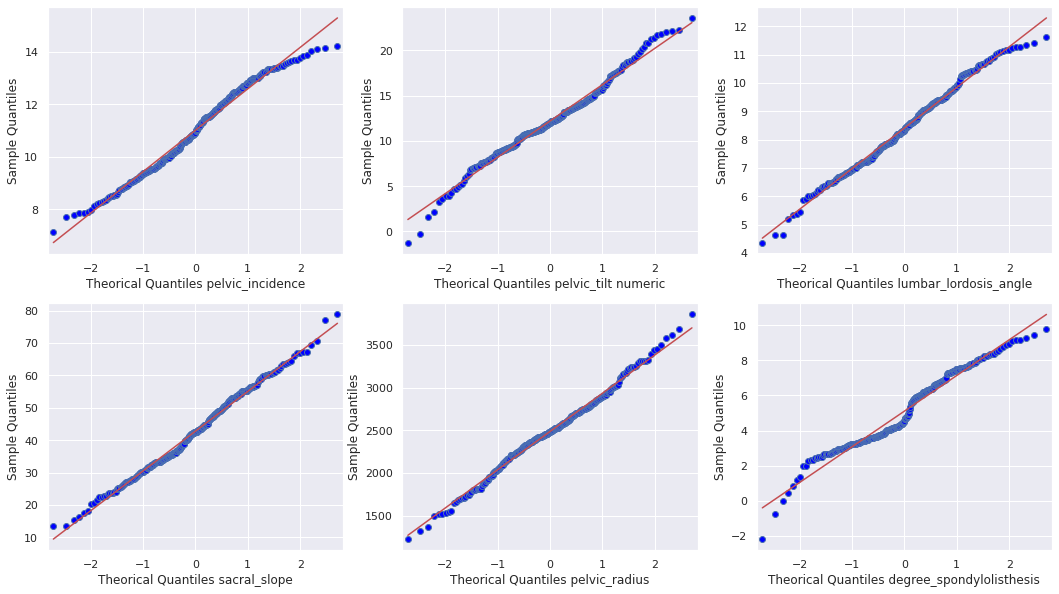

Pruebas de Shapiro-Wilk
Estadisticos pelvic_incidence= 0.98027, p= 0.00040
Estadisticos pelvic_tilt numeric= 0.98787, p= 0.01341
Estadisticos lumbar_lordosis_angle= 0.99110, p= 0.06851
Estadisticos sacral_slope= 0.99252, p= 0.14019
Estadisticos pelvic_radius= 0.99442, p= 0.34739
Estadisticos degree_spondylolisthesis= 0.96348, p= 0.00000


In [104]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

qqplot(df['pelvic_incidence'] , line='s', ax=axes[0, 0], xlabel='Theorical Quantiles pelvic_incidence')
qqplot(df['pelvic_tilt numeric'] , line='s', ax=axes[0, 1], xlabel='Theorical Quantiles pelvic_tilt numeric')
qqplot(df['lumbar_lordosis_angle'] , line='s', ax=axes[0, 2], xlabel='Theorical Quantiles lumbar_lordosis_angle')
qqplot(df['sacral_slope'] , line='s', ax=axes[1, 0], xlabel='Theorical Quantiles sacral_slope')
qqplot(df['pelvic_radius'] , line='s', ax=axes[1, 1], xlabel='Theorical Quantiles pelvic_radius')
qqplot(df['degree_spondylolisthesis'] , line='s', ax=axes[1, 2], xlabel='Theorical Quantiles degree_spondylolisthesis')
plt.show()

print('Pruebas de Shapiro-Wilk')
# Prueba de Shapiro-Wilk
for i in df.columns:
  if i != 'class':
    stat, p = shapiro(df[i])
    print('Estadisticos ' + i + '= %.5f, p= %.5f' % (stat, p))

Pese a transformar los datos 3 variables siguen sin pasar la prueba de normalidad. Sin embargo si incrementó considerablemente su normalidad en el resto de variables, ademas tomando como referencia el modelo anterior el cual probó ser bastante preciso, se probarán dos modelos, uno utilizando todas las variables y otro eliminando las variables que no están normalizadas. Este ultimo paso con el objetivo de definir el mejor modelo.

#### Modelo utilizando todas las variables

In [105]:
X= df.drop(columns = 'class').to_numpy() #Variable independiente
y= df["class"].to_numpy() #Variable dependiente

#Se dividen los datos para tener una sección que sirva para validar y otra que se usará para alimentar el modelo.
X, X_validacion, y, y_validacion = train_test_split(X,y,random_state=0, train_size= 0.9)

#Se dividen los datos para tener datos de entrenamiento y de pruebas
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, train_size= 0.8)

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  214
Model:                          Logit   Df Residuals:                      207
Method:                           MLE   Df Model:                            6
Date:                Mon, 19 Sep 2022   Pseudo R-squ.:                     inf
Time:                        03:10:45   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.7075      6.978     -2.394      0.017     -30.383      -3.032
x1             2.8181      1.613  

En una primera instancia es una buena señal que el modelo converga, caso contrario a la situación anterior donde el modelo utilizó el limite de iteraciones sin converger.  
#### Predicciones

In [106]:
predicciones = modelo.predict(exog = X_train)

# Clasificación predicción
clasificacion = np.where(predicciones<0.5, 0, 1)
print(clasificacion)

X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"La precisión de test es: {100*accuracy}%")

[0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1
 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0
 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0]

La precisión de test es: 83.33333333333334%


La precisión es menor a la presición del primer modelo, por lo tanto se descarta.  
  
#### Modelo variables normalizadas

In [107]:
X= df.drop(columns = ['class', 'pelvic_incidence', 'pelvic_tilt numeric', 'degree_spondylolisthesis']).to_numpy() #Variable independiente
y= df["class"].to_numpy() #Variable dependiente

#Se dividen los datos para tener una sección que sirva para validar y otra que se usará para alimentar el modelo.
X, X_validacion, y, y_validacion = train_test_split(X,y,random_state=0, train_size= 0.9)

#Se dividen los datos para tener datos de entrenamiento y de pruebas
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, train_size= 0.8)

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  214
Model:                          Logit   Df Residuals:                      210
Method:                           MLE   Df Model:                            3
Date:                Mon, 19 Sep 2022   Pseudo R-squ.:                     inf
Time:                        03:10:46   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2698      1.528     -1.486      0.137      -5.264       0.724
x1            -0.6770      0.191  

##### Prediciones

In [108]:
predicciones = modelo.predict(exog = X_train)

# Clasificación predicción
clasificacion = np.where(predicciones<0.5, 0, 1)
print(clasificacion)

X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"La precisión de test es: {100*accuracy}%")

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]

La precisión de test es: 72.22222222222221%


Utilizar solamente las variables normalizadas resultó en una disminución de la precisón del modelo. En conclusión, el primer modelo probó ser el de mayor precisión a la hora de clasificar si el padecimiento del paciente será calsificado como normal o anormal.  
  
### Conclusiones
El primer modelo fue el más efectivo con un 83% de precisión validado con un subdataset diferente del subdataset de entrenamiento y pruebas.  
No presenta overfit ni under fit, sin embargo los datos con los cuales se entreno el modelo si presentaron un sesgo positivo hacia la derecha. Pese a que en el el segundo modelo fue entrenado con datos normalizados, su clasificación no fue tan precisa como el del primer modelo. Por lo que el mejor modelo fue el primero.  
Sumado a esto se realizaron 5 pruebas individuales para validar el primer modelo y tuvo un 100% de acierto en su predicción.